<a href="https://colab.research.google.com/github/Mikaykay/DS-Unit-2-Linear-Models/blob/master/Unit2_1_2_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

In [2]:
# import the important libraries
import pandas as pd # for reading data and dataframes
import numpy as np # for arrays and basic math functions
import sys
import warnings
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression  
import matplotlib.pyplot as plt


# I. Wrangle Data

In [3]:
def wrangle(filepath):
    df = pd.read_csv(filepath,index_col = 'created', parse_dates = ['created'])
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    
    # Adding number of features to the dataframe
    df['number_of_perks'] = df[['elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space']].sum(axis = 1)

    df['number_of_beds_and_baths'] = df[['bathrooms','bedrooms']].sum(axis = 1)

    df.drop(columns = df.select_dtypes('object').columns, inplace = True)

    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [4]:
df = wrangle(filepath)
df.head()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,number_of_perks,number_of_beds_and_baths
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,40.7145,-73.9425,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.5
2016-06-12 12:19:27,1.0,2,40.7947,-73.9667,5465,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,3.0
2016-04-17 03:26:41,1.0,1,40.7388,-74.0018,2850,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0
2016-04-18 02:22:02,1.0,1,40.7539,-73.9677,3275,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0
2016-04-28 01:32:41,1.0,4,40.8241,-73.9493,3350,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.0


**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

In [5]:
# Conduct your exploratory data analysis here, 
# and then modify the function above.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48817 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bathrooms                 48817 non-null  float64
 1   bedrooms                  48817 non-null  int64  
 2   latitude                  48817 non-null  float64
 3   longitude                 48817 non-null  float64
 4   price                     48817 non-null  int64  
 5   elevator                  48817 non-null  int64  
 6   cats_allowed              48817 non-null  int64  
 7   hardwood_floors           48817 non-null  int64  
 8   dogs_allowed              48817 non-null  int64  
 9   doorman                   48817 non-null  int64  
 10  dishwasher                48817 non-null  int64  
 11  no_fee                    48817 non-null  int64  
 12  laundry_in_building       48817 non-null  int64  
 13  fitness_center            

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [6]:
target = 'price'
X = df.drop(columns= target)
y = df[target]

print(f'Feature matrix (X) shape: {X.shape}\nTarget vector (y) shape: {y.shape}')

Feature matrix (X) shape: (48817, 30)
Target vector (y) shape: (48817,)


**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [7]:
# Creating the cutoff for training and test data sets
cutoff = X.index <'2016-06-01'

# Creating the training data set
X_train, y_train = X.loc[cutoff], y.loc[cutoff]

# Creating the test data set
X_test, y_test = X.loc[~cutoff], y.loc[~cutoff]

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [8]:
y_base_pred = [y_train.mean()]*len(y_train)
baseline_mae = mean_absolute_error(y_train,y_base_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1201.8811133682555


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [15]:
# Step 1: Import predictor class
# from sklearn.linear_model import LinearRegression

# Step 2: Instantiate predictor
model_lr = LinearRegression()

# Step 3: Fit predictor on the (training) data
model_lr.fit(X_train,y_train)
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [16]:
training_mae = mean_absolute_error(y_pred_train,y_train)
test_mae = mean_absolute_error(y_pred_test,y_test)

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 692.7031340482181
Test MAE: 701.2543839547354


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [17]:
training_r2 = model_lr.score(X_train,y_train)
test_r2 = model_lr.score(X_test,y_test)

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 0.6172845668534068
Test MAE: 0.6256490485476423


# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

In [26]:
# Lets look at the coefficients and what they are associated with
feature_importance = abs(pd.Series(model_lr.coef_, index = X_train.columns)).sort_values()
feature_importance.head()


latitude               1.640994e+03
longitude              1.368457e+04
high_speed_internet    1.215105e+14
laundry_in_building    1.215105e+14
hardwood_floors        1.215105e+14
dtype: float64

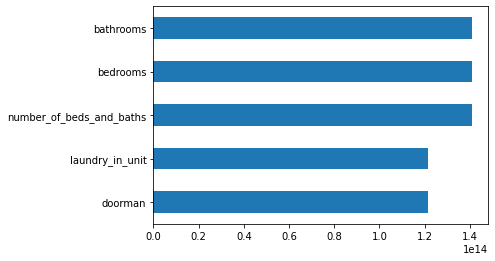

In [29]:
feature_importance.tail(5).plot(kind = 'barh')
plt.show()